<h2>Continuous Parameter Possibilities</h2>
The previous example can be a bit tricky, only because it's unlike most of the parameter estimation we've performed up to this point.  In most cases, we are trying to find a parameter value for a coin not from a discrete set of options, but rather, from a continuous range of probabilities.

Let's consider the same scenario as before, however, in this case, we simply state that we don't know the probability of heads for the coin.  This is the probability we're modeling; the probability that a particular parameter set that is used in our Binomial distribution is valid. At this point, we need to select a probability distribution that would be good for modeling our parameters.

<details>
<summary>
<b>Question - </b> What would be a good PDF in this case?  What properties do we want our distribution to have?
</summary>
We prefer the $\beta$ distribution.  The $\beta$ distribution is ideal for this case, because it supports values between 0 and 1, and is a continuous probability distribution.
</details>

Sticking with our example, we'll still suppose that $p(X=1)=.7$ is our expectation value, but that any value is now valid.  Check out the <a href="https://en.wikipedia.org/wiki/Beta_distribution">Wikipedia article on the beta distribution</a>.  Let's have a look at what that would look like:

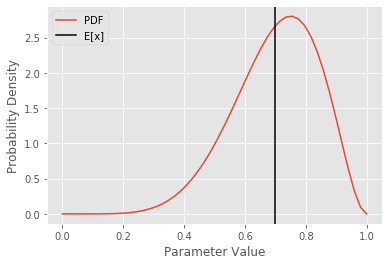

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from scipy.stats import beta

par_alpha, par_beta = 7, 3
_x = np.linspace(0,1,50)
fig, ax = plt.subplots()
ax.plot(_x, beta.pdf(_x, par_alpha, par_beta), label="PDF")
ax.axvline(.7, color='k', label=("E[x]"))
ax.set_xlabel("Parameter Value")
ax.set_ylabel("Probability Density")
_ = ax.legend(loc="upper left")

We can see that we have a reasonable distribution of probabilities.  It does effectively rule out values below .2, which in our initial statement of the problem, we didn't want to be the case.  The nice thing is, the beta distribution allows us to control it's width with the magnitude of our parameters, $\alpha$ and $\beta$.

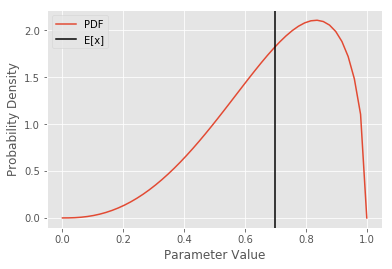

In [3]:
par_alpha, par_beta = 3.5, 1.5
fig, ax = plt.subplots()
ax.plot(_x, beta.pdf(_x, par_alpha, par_beta), label="PDF")
ax.axvline(.7, color='k', label=("E[x]"))
ax.set_xlabel("Parameter Value")
ax.set_ylabel("Probability Density")
_ = ax.legend(loc="upper left")

Here, we see that smaller values for our parameters convey a larger degree of uncertainty regarding the actual value of coin.  If we have no idea what the value of the coin is initially, we can use $\alpha = 1, \beta=1$:

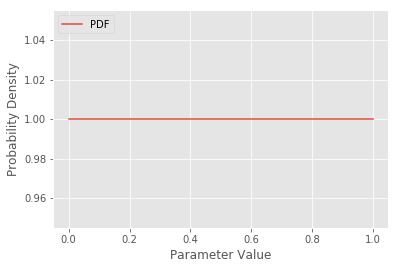

In [4]:
par_alpha, par_beta = 1, 1
fig, ax = plt.subplots()
ax.plot(_x, beta.pdf(_x, par_alpha, par_beta), label="PDF")
ax.set_xlabel("Parameter Value")
ax.set_ylabel("Probability Density")
_ = ax.legend(loc="upper left")

Note, that these parameter values will give outcomes consistent with MLE.  Let's now turn our attention to what an update will look like:
$$
p(\theta | x) = \frac{\mathcal{L}(x | \theta)*p(\theta)}{p(x)}\\
= \frac{({N \choose x}\theta^{\sum x_i}*(1-\theta)^{N - \sum x_i})*(\frac{\Gamma(\alpha + \beta)\theta^{\alpha-1}*(1-\theta)^{\beta-1}}{\Gamma(\alpha)*\Gamma(\beta)})}{\int_0^1 ({N \choose x}\theta '^{\sum x_i}*(1-\theta')^{N - \sum x_i})*(\frac{\Gamma(\alpha + \beta)\theta '^{\alpha-1}*(1-\theta')^{\beta-1}}{\Gamma(\alpha)*\Gamma(\beta)}) \,d\theta '}
$$

Note that we distinguish a difference between the resulting parameter, $\theta$, and the denominators variable of integration, $\theta '$. Technically, the above equation is a total bummer.  Let's do a little bit of algebra to simplify.  We'll start by canceling the ${N \choose x}$ terms, as well as the $\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)*\Gamma(\beta)}$ (neither of which are attached to the variable of integration, $\theta '$):
$$
p(\theta | x) = \frac{(\theta^{\sum x_i}*(1-\theta)^{N - \sum x_i})*(\theta^{\alpha-1}*(1-\theta)^{\beta-1})}{\int_0^1 (\theta '^{\sum x_i}*(1-\theta')^{N - \sum x_i})*(\theta '^{\alpha-1}*(1-\theta')^{\beta-1}) \,d\theta '} \\
= \frac{\theta^{\alpha-1+\sum x_i}*(1-\theta)^{\beta-1 + N - \sum x_i}}{\int_0^1 \theta '^{\alpha-1 + \sum x_i}*(1-\theta')^{\beta-1 + N - \sum x_i} \,d\theta '} 
$$

If we look at the denominator of this equation, it look *almost* like a $\beta$ distribution.  Instead of having the factor $\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)*\Gamma(\beta)}$, we'd instead want $\frac{\Gamma((\alpha + \sum x_i)*\Gamma(\beta + N - \sum x_i))}{\Gamma(\alpha + \sum x_i)*\Gamma(\beta  + N - \sum x_i))}$.  We free to add that to the denominator, as long as we add it to the numerator as well.  If we do so, the denominator is simply the integral of a pdf over it's entire support region, i.e. 1!  We're left with the following relationship:
$$
p(\theta | x) = (\Gamma(\alpha + \sum x_i) * \Gamma(\beta + N - \sum x_i))*\theta^{\alpha-1+\sum x_i}*(1-\theta)^{\beta-1 + N - \sum x_i} \\
= \beta(\theta, \alpha + \sum x_i, \beta + N - \sum x_i)
$$

It turns out, if we are using the $\beta$ distribution to model the probability parameter for a binomial likelihood function, the resulting probability distribution is also a $\beta$ distribution!

<h2>Conjugate Priors</h2>
The above variable manipulation is not a coincidence.  It turns out that when any of the fundamental probability distributions are used as the likelihood function, there exists a particular distribution that has the same functional form before and after the update.  We call such distributions <b>conjugate priors</b>.  As we have seen, the $\beta$ distribution is the conjugate prior for the Binomial distribution.  The update mechanic is extremely simple - if we start with parameters $\alpha$ and $\beta$, we simply add the number of successes and failures (respectively) to each quantity.  Let's see this in action.  Suppose we got the same results as the previous notebook, 2 heads in 5 flips.  Let's look at what the resulting distribution will be with the above three priors:


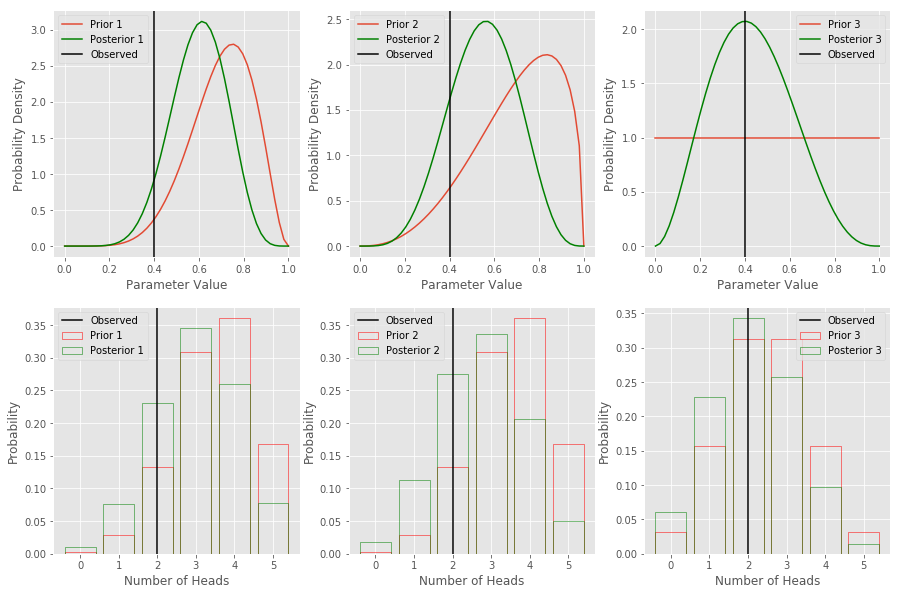

In [5]:
from scipy.stats import binom

binom_support_space = [x for x in range(6)]

fig, ax = plt.subplots(2,3, figsize=(15,10))
ax[0, 0].plot(_x, beta.pdf(_x, 7, 3), label="Prior 1")
ax[0, 0].plot(_x, beta.pdf(_x, 9, 6), c='g', label="Posterior 1")
ax[0, 0].axvline(.4, c='k', label="Observed")
ax[0, 0].set_xlabel("Parameter Value")
ax[0, 0].set_ylabel("Probability Density")
ax[0, 0].legend(loc="best")

ax[1, 0].bar(binom_support_space, binom.pmf(binom_support_space, 5, .7), edgecolor='r', fill=False, label="Prior 1")
ax[1, 0].bar(binom_support_space, binom.pmf(binom_support_space, 5, .6), edgecolor='g', fill=False, label="Posterior 1")
ax[1, 0].axvline(2, c='k', label="Observed")
ax[1, 0].set_xlabel("Number of Heads")
ax[1, 0].set_ylabel("Probability")
ax[1, 0].legend(loc="best")

ax[0, 1].plot(_x, beta.pdf(_x, 3.5, 1.5), label="Prior 2")
ax[0, 1].plot(_x, beta.pdf(_x, 5.5, 4.5), c='g', label="Posterior 2")
ax[0, 1].axvline(.4, c='k', label="Observed")
ax[0, 1].set_xlabel("Parameter Value")
ax[0, 1].set_ylabel("Probability Density")
ax[0, 1].legend(loc="best")

ax[1, 1].bar(binom_support_space, binom.pmf(binom_support_space, 5, .7), edgecolor='r', fill=False, label="Prior 2")
ax[1, 1].bar(binom_support_space, binom.pmf(binom_support_space, 5, .55), edgecolor='g', fill=False, label="Posterior 2")
ax[1, 1].axvline(2, c='k', label="Observed")
ax[1, 1].set_xlabel("Number of Heads")
ax[1, 1].set_ylabel("Probability")
ax[1, 1].legend(loc="best")

ax[0, 2].plot(_x, beta.pdf(_x, 1, 1), label="Prior 3")
ax[0, 2].plot(_x, beta.pdf(_x, 3, 4), c='g', label="Posterior 3")
ax[0, 2].axvline(.4, c='k', label="Observed")
ax[0, 2].set_xlabel("Parameter Value")
ax[0, 2].set_ylabel("Probability Density")
ax[0, 2].legend(loc="best")

ax[1, 2].bar(binom_support_space, binom.pmf(binom_support_space, 5, .5), edgecolor='r', fill=False, label="Prior 3")
ax[1, 2].bar(binom_support_space, binom.pmf(binom_support_space, 5, .429), edgecolor='g', fill=False, label="Posterior 3")
ax[1, 2].axvline(2, c='k', label="Observed")
ax[1, 2].set_xlabel("Number of Heads")
ax[1, 2].set_ylabel("Probability")
_ = ax[1, 2].legend(loc="best")

One important note, we initialize our beta distributions to have the right <b>Expecation Value</b>, and we continue to use $E[x]=\frac{\alpha}{\alpha+\beta}$.

<h2>Updates With Prior Conjugates</h2>
Just as we did with discrete outcome spaces, we simply plug in our new probability distribution in after the observed evidence.  Let's take a look at what this might look like in practice.  We'll initialize our prior in the same way as above.  I'll then generate 3 samples of 20 observations with a fixed probability (in this case $p(x=1)=.4$).  We can visualize the posterior after every step. Feel free to experiment with the cell below to see the effects of more trials, or more samples per trial.

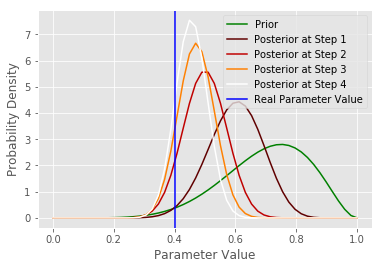

In [6]:
import matplotlib.cm as cmx
import matplotlib.colors as colors

maxx_itt = 4
cmap = cm = plt.get_cmap('gist_heat') 
cNorm  = colors.Normalize(vmin=0, vmax=maxx_itt)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

def generate_success_failures(n=20):
    suc = np.random.binomial(n, .4)
    return suc, n-suc

par_alpha, par_beta = 7, 3
fig, ax = plt.subplots()
ax.plot(_x, beta.pdf(_x, par_alpha, par_beta), c='g', label="Prior")
for i in range(1,maxx_itt+1):
    colorVal = scalarMap.to_rgba(i)
    trial_results = generate_success_failures()
    par_alpha, par_beta = par_alpha + trial_results[0], par_beta + trial_results[1]
    ax.plot(_x, beta.pdf(_x, par_alpha, par_beta), color=colorVal, label="Posterior at Step {}".format(i))

ax.set_xlabel("Parameter Value")
ax.set_ylabel("Probability Density")
ax.axvline(.4, c='b', label="Real Parameter Value")
_ = ax.legend(loc='best')
    